# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

data = pd.read_csv("../Documents/GitHub/APMAE4990-/data/hw2data.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,y
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,0.895260,1.374964,-1.332212,-1.968625,-0.660056,0.175819,0.498690,1.047972,0.284280,1.742669,-0.222606,-0.913079,-1.681218,-0.888971,0.242118,-0.888720,0.936742,1.412328,-2.369587,0.864052,-2.239604,0.401499,1.224871,0.064856,-1.279689,-0.585431,-0.261645,-0.182245,-0.202897,-0.109883,0.213480,-1.208574,-0.242020,1.518261,-0.384645,-0.443836,1.078197,-2.559185,1.181379,-0.631904,0.163929,0.096321,0.942468,-0.267595,-0.678026,1.297846,-2.364174,0.020334,-1.347925,-0.761573,2.011257,-0.044595,0.195070,-1.781563,-0.729045,0.196557,0.354758,0.616887,0.008628,0.527004,0.453782,-1.829740,0.037006,0.767902,0.589880,-0.363859,-0.805627,-1.118312,-0.131054,1.133080,-1.951804,-0.659892,-1.139802,0.784958,-0.554310,-0.470638,-0.216950,0.445393,-0.392389,-3.046143,0.543312,0.439043,-0.219541,-1.084037,0.351780,0.379236,-0.470033,-0.216731,-0.930157,-0.178589,-1.550429,0.417319,-0.944368,0.238103,-1.405963,-0.590058,-0.110489,-1.660700,0.115148,-0.379148,-1.742356,-1.303243,0.605120,0.895556,-0.131909,0.404762,0.223844,0.329623,1.285984,-1.506998,0.676461,-0.382009,-0.224259,-0.302250,-0.375147,-1.226196,0.183339,1.670943,-0.056133,-0.001385,-0.687299,-0.117475,0.466166,-0.370242,-0.453804,0.403265,-0.918005,0.252497,0.820322,1.359949,-0.090382,1.367597,1.034410,-0.996213,-1.217939,-0.304964,1.028935,-0.072287,-0.600658,1.552243,0.286904,-2.320594,0.317161,0.520041,0.225609,0.449712,-0.067276,-1.318396,-0.370704,-0.945616,-0.932741,-1.263068,0.452489,0.097896,-0.448165,-0.649338,-0.023423,1.079195,-2.004216,0.376877,-0.545712,-1.884586,-1.945703,-0.912783,0.219510,0.393063,-0.938982,1.017021,1.422983,0.396087,-0.591403,1.124419,0.755396,0.867407,-0.656464,-2.834555,2.116791,-1.610878,-0.035768,2.380745,0.330577,0.949246,-1.502397,-1.777667,-0.532703,1.090750,-0.346249,-0.794636,0.197967,1.081935,-1.444940,-1.210543,-0.788669,1.094638,0.234822,2.132153,0.936446,-0.035095,1.265078,0.211497,-0.704921,0.679975,-0.696327,-0.290397,1.327783,-0.101281,-0.803141,-0.464338,1.021791,-0.552541,-0.

b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

In [18]:
y = data.iloc[:,-1]
X = data.iloc[:,0:500]

y.head()

0    -2.663126
1    10.399650
2   -21.762801
3     2.139453
4     0.194017
Name: y, dtype: float64

In [19]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,0.382732,-0.034242,1.096347,-0.234216,-0.347451,-0.581268,-1.632635,-1.567768,-1.179158,1.301428,0.895260,1.374964,-1.332212,-1.968625,-0.660056,0.175819,0.498690,1.047972,0.284280,1.742669,-0.222606,-0.913079,-1.681218,-0.888971,0.242118,-0.888720,0.936742,1.412328,-2.369587,0.864052,-2.239604,0.401499,1.224871,0.064856,-1.279689,-0.585431,-0.261645,-0.182245,-0.202897,-0.109883,0.213480,-1.208574,-0.242020,1.518261,-0.384645,-0.443836,1.078197,-2.559185,1.181379,-0.631904,0.163929,0.096321,0.942468,-0.267595,-0.678026,1.297846,-2.364174,0.020334,-1.347925,-0.761573,2.011257,-0.044595,0.195070,-1.781563,-0.729045,0.196557,0.354758,0.616887,0.008628,0.527004,0.453782,-1.829740,0.037006,0.767902,0.589880,-0.363859,-0.805627,-1.118312,-0.131054,1.133080,-1.951804,-0.659892,-1.139802,0.784958,-0.554310,-0.470638,-0.216950,0.445393,-0.392389,-3.046143,0.543312,0.439043,-0.219541,-1.084037,0.351780,0.379236,-0.470033,-0.216731,-0.930157,-0.178589,-1.550429,0.417319,-0.944368,0.238103,-1.405963,-0.590058,-0.110489,-1.660700,0.115148,-0.379148,-1.742356,-1.303243,0.605120,0.895556,-0.131909,0.404762,0.223844,0.329623,1.285984,-1.506998,0.676461,-0.382009,-0.224259,-0.302250,-0.375147,-1.226196,0.183339,1.670943,-0.056133,-0.001385,-0.687299,-0.117475,0.466166,-0.370242,-0.453804,0.403265,-0.918005,0.252497,0.820322,1.359949,-0.090382,1.367597,1.034410,-0.996213,-1.217939,-0.304964,1.028935,-0.072287,-0.600658,1.552243,0.286904,-2.320594,0.317161,0.520041,0.225609,0.449712,-0.067276,-1.318396,-0.370704,-0.945616,-0.932741,-1.263068,0.452489,0.097896,-0.448165,-0.649338,-0.023423,1.079195,-2.004216,0.376877,-0.545712,-1.884586,-1.945703,-0.912783,0.219510,0.393063,-0.938982,1.017021,1.422983,0.396087,-0.591403,1.124419,0.755396,0.867407,-0.656464,-2.834555,2.116791,-1.610878,-0.035768,2.380745,0.330577,0.949246,-1.502397,-1.777667,-0.532703,1.090750,-0.346249,-0.794636,0.197967,1.081935,-1.444940,-1.210543,-0.788669,1.094638,0.234822,2.132153,0.936446,-0.035095,1.265078,0.211497,-0.704921,0.679975,-0.696327,-0.290397,1.327783,-0.101281,-0.803141,-0.464338,1.021791,-0.552541,-0.38

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

/Users/admin/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


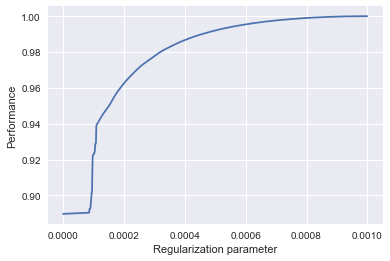

Regularisation Strength that optimises R^2: 0.0009885417


In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#Set range of alphas to test based on above hint
alphas = np.logspace(-8,-3,1000)

#Set empty array to append R^2 scores
scores = []


# Train the model using the training sets and finding R^2 scores on testing data
for alpha in alphas:
    regr = Lasso(alpha=alpha)
    regr.fit(X_train, y_train)
    scores.append(regr.score(X_test,y_test))
    
plt.plot(alphas,scores)
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')
plt.show()

best_alpha=alphas[np.argmax(scores)]
print('Regularisation Strength that optimises R^2: %.10f' % best_alpha)

d) Plot the training perforamnce versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

/Users/admin/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


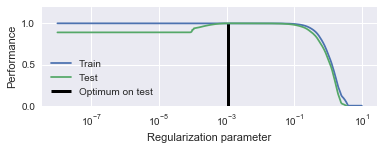

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.subplot(2, 1, 1)

#Extend range of alphas to test in order to determine maximum point on graph. 
alphas = np.logspace(-8,1,1000)
train_errors=[] 
test_errors=[] 

#Train the model using the training sets and finding R^2 scores on training and testing data
for alpha in alphas:
    regr2 = Lasso(alpha=alpha)
    regr2.fit(X_train, y_train)
    train_errors.append(regr2.score(X_train,y_train)) 
    test_errors.append(regr2.score(X_test,y_test))

#Finding optimum alpha
alpha_optim=alphas[np.argmax(test_errors)]

#Plotting graph
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k',
           linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')


plt.show()

##### Comments:

From the plot and the previous part, we find that the alpha which maximises the test performance, as measured by the $R^2$, (the maximum point of the graph) is 0.000988, just before 0.001.

e) Plot the top coefficients based on this optimal paramter. Why do you think so many are zero? 

In [27]:
#Finding coefficients under optimum alpha
regr3 = Lasso(alpha=best_alpha) 
regr3.fit(X_train,y_train) 
coef = [float(x) for x in regr3.coef_]
round_coef = [round(x, 3) for x in coef]
print(sorted(round_coef))

[-2.552, -1.982, -1.703, -1.611, -1.448, -1.417, -1.248, -1.043, -0.973, -0.881, -0.852, -0.741, -0.505, -0.437, -0.385, -0.341, -0.299, -0.209, -0.207, -0.187, -0.151, -0.099, -0.003, -0.003, -0.003, -0.002, -0.002, -0.002, -0.002, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, -0.001, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0,

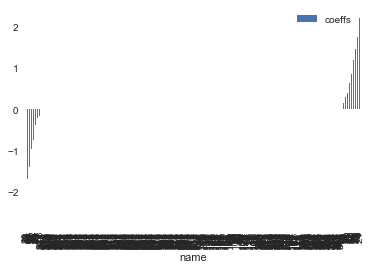

In [32]:
#Plotting all coefficients
(df_coeffs.sort_values(['coeffs'])).plot(x='name',y='coeffs', kind='bar')
plt.show()

##### Comments:

From the plot of all the coefficients, we find that most of the coefficients are zero. This occurs because Lasso regularisation used the L1 norm as a penalty when finding the optimum regularisation strength that maximised performance. When two predictors are highly correlated, the L1 regulariser will simply pick one of the two predictors and send the coefficient of the other predictor to zero. This stands in contrast with an L2 regulariser, which will try to keep both predictors and shrink both corresponding coefficients by a little.

Another way of understanding is to visualise the Lp spaces. As the value of p decreases, the size of the corresponding Lp space also decreases. The L1 norm has level sets which are boxes, which makes it more likely to set coefficients to zero. This is unlike the L2 norm which has a circular level set. 

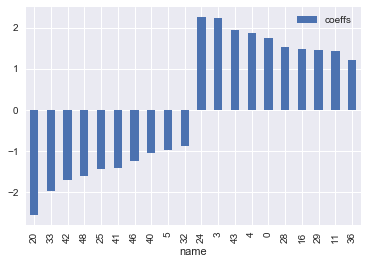

In [33]:
#Plotting only top ten positive and top ten negative coefficients
df_coeffs = pd.DataFrame({'coeffs':regr3.coef_, 'name':X.columns.values})
df_topcoeffs = pd.concat([df_coeffs.sort_values(['coeffs']).head(10),df_coeffs.sort_values(['coeffs'], ascending=False).head(10)])
df_topcoeffs.plot(x='name',y='coeffs', kind='bar')
plt.show()

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

[ 0.99999247  0.999997    0.99999728  0.99999433  0.99998968]


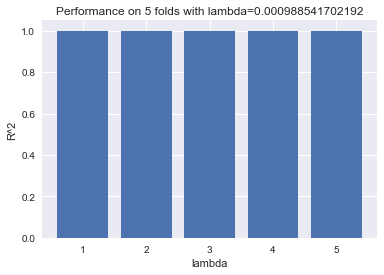

In [34]:
#Finding performance across 5 folds with optimum alpha
regr_optimum = Lasso(alpha=best_alpha)
cross_val_scores = cross_val_score(regr_optimum, X, y, cv=5)
print(cross_val_scores)
plt.xlabel('lambda')
plt.ylabel('R^2')
plt.title('Performance on 5 folds with lambda=' + str(best_alpha))
plt.bar(range(1,6),cross_val_scores)
plt.show()

##### Comments:

The model works very well across all 5 folds as evident from the very high R^2 of close to 1 for all folds. 

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [35]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
    coeffs=[]
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs

scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

#Because this section used predictors that have been standardised, I find a new optimum alpha for standardised predictors (which will be different from the optimum alpha for non-standardised predictors)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)
alphas = np.logspace(-8,-3,1000)
scores_standardised = []
for alpha in alphas:
    regr4 = Lasso(alpha=alpha)
    regr4.fit(X_train2, y_train2)
    scores_standardised.append(regr4.score(X_test2,y_test2))
best_alpha_standardised=alphas[np.argmax(scores_standardised)]

coeffs=run_cv_coeffs(X_scaled,np.array(y),Lasso,alpha=best_alpha_standardised)

/Users/admin/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/admin/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [36]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

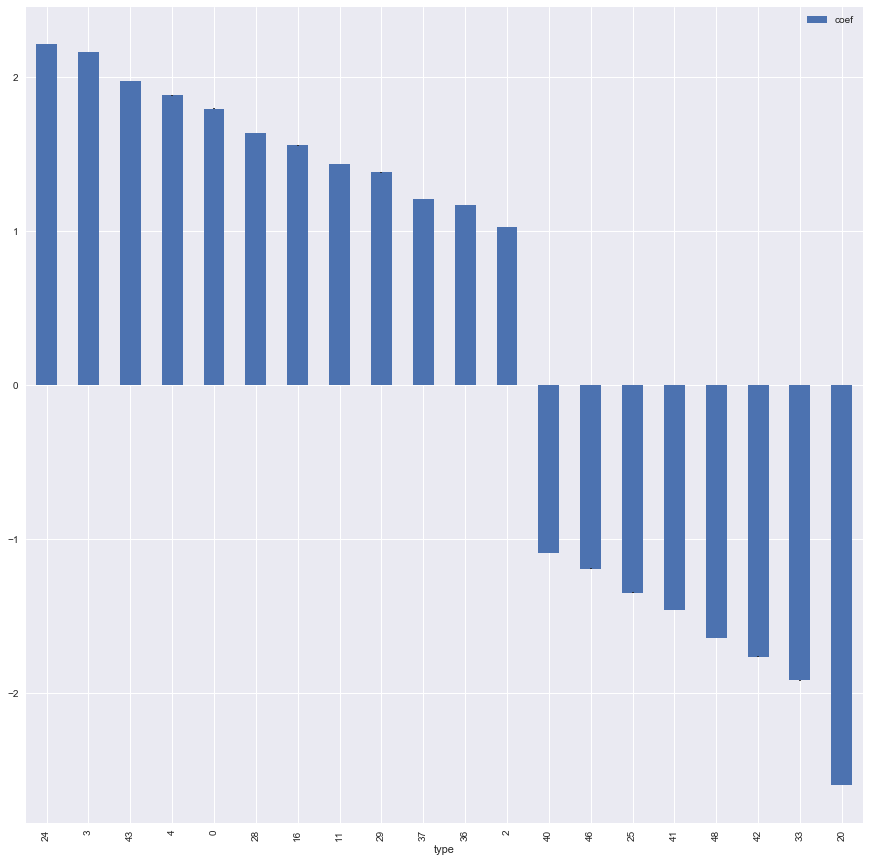

In [37]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort_values(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))